# Learn an XOR Neural Network using gradient-based optimization

## Steps

1. Setting the scene
2. Model 1: linear, one layer, no activation function 
3. Model 2: almost linear, one layer, sigmoid activation function 
4. Model 3: one hidden layer with linear and one output layer with sigmoid activation 
5. Model 4: one hidden layer with relu and one output layer with sigmoid activation 
6. Comparison with Model 4 learned with Tensorflow

## Setting the scene

All models $m_i$ follow the standard Neural Network architecture: <img src="img/NN.jpg"> The models vary in the number of layers, the numbers of neurons per layer and in the activation function.

During learning, we optimize the mean squared error $MSE$ of the models $m$ for the model parameters $\mathbf w, \mathbf b$: 

$$MSE(\mathbf w,\mathbf b,m,X,Y) =\frac{1}{N}\sum_{i=1}^{N}(y_i - m(\mathbf w, \mathbf  b, x_i))^2$$

In [1]:
%%file mse.m
function err = mse(ws,m,X,Y)
    N = length(X);
    err = 0;
    for i=1:N
        xi=X(i,:);
        yi=m(ws,xi);
        err = err + (Y(i)-yi)^2;
    end
    err = err/N;
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/mse.m'.


In other words, we find $\arg\min_{\mathbf w, \mathbf b} MSE(\mathbf w, \mathbf b,m,X,Y)$.
Since we implement a binary, logic function (two arguments, two values per argument), $N=2^2=4$ and $X,Y$ define the XOR function:

In [2]:
X=[0,0;0,1;1,0;1,1]
Y=[0,1,1,0].'


X =

     0     0
     0     1
     1     0
     1     1


Y =

     0
     1
     1
     0




## Model 1: linear, one layer, no activation function 

The first model is a (too) simple linear Neural Network model. It consists of one neuron connected to the input $x_1$ and $x_2$ and an identity, i.e., no effective, activation function. The neuron and the whole model $m_1$ implements $m_1(\mathbf w, b, x) = w_1x_1+w_2x_2+b$.

In [3]:
m1 = @(ws,x)(ws(1)*x(1) + ws(2)*x(2) + ws(3));
mse1 = @(ws)(mse(ws,m1,X,Y));

As the Tensorflow default, we implement the Glorot uniform initializer for setting the initial weights $\mathbf w_0$.
It draws samples from a uniform random distribution within $[-\mathit{limit}, \mathit{limit}]$,
where $\mathit{limit} = \sqrt{\frac{6}{\mathit{in} + \mathit{out}}}$, and
where $\mathit{in}$ and $\mathit{out}$ is the number of input and output units, resp. The initial bias $b_0$ is set to $0$.

In [4]:
in = 2;
out = 1;
limit = sqrt(6 / (in + out));
ws0 = [rand*2*limit-limit;rand*2*limit-limit;0]


ws0 =

    0.8902
    1.1478
         0




We are ready to assess $MSE$ for $m_1$ for this initial weights setting.

In [5]:
mse1(ws0)


ans =

    1.0468




The gradient of $MSE(\mathbf w,b)$ for any $\mathbf w, b$ is defiend as:

$$
\begin{aligned}
\nabla MSE(\mathbf w,b) &= \left [ 
\frac{\partial MSS(\mathbf w,b)}{\partial w_1}, 
\frac{\partial MSS(\mathbf w,b)}{\partial w_2}, 
\frac{\partial MSE(\mathbf w,b)}{\partial b}
\right ]^T\\
&= \frac{1}{4}\left [ 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial w_1}, 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial w_2}, 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial b} 
\right ]^T \\
&= \frac{1}{4} \left [ 
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
&= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
\end{aligned}
$$

We can plug in the function $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$ resp.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

We have already defined the function $m_1$. Let's also define the functions of the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$ resp. For the sake of generality, we keep the parameters $\mathbf w, b$ that are actually not needed for  derivatives of this concrete model $m_1$. 

In [6]:
gradients1{1} = @(ws,x)(x(1));
gradients1{2} = @(ws,x)(x(2));
gradients1{3} = @(ws,x)(1);

The gradient of $MSE$ can now be defined using $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as parameters.

In [7]:
%%file grad_mse.m
function grad_ws = grad_mse(ws, m, grads, X, Y)
    N = length(X);
    M = length(ws);
    grad_ws = zeros(M,1);
    for i=1:N
        xi = X(i,:);
        yi = Y(i);
        tmp = yi - m(ws,xi);
        for j=1:M
            grad_ws(j) = grad_ws(j) + tmp*grads{j}(ws,xi);
        end
    end
    grad_ws = -2/N*grad_ws;
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_mse.m'.


Finally, we are ready to define the gradient descent function optimizing $\mathbf w, b$ by iterating over:

$$(\mathbf w_{k+1}, b_{k+1}) = (\mathbf w_k, b_k) - \varepsilon \nabla MSE(\mathbf w_k,b_k)$$

staring with $(\mathbf w_0, b_0)$.

In [8]:
%%file grad_desc_mse.m
function [ws, history] = grad_desc_mse(K, ws, learning_eps, loss, grad_loss, verbose)
    history(1) = loss(ws);
    for k = 1:K
        grad_ws = grad_loss(ws);
        old_ws = ws;
        ws= old_ws - learning_eps * grad_ws;
        if verbose
            line([old_ws(1),ws(1)],[old_ws(2),ws(2)]);
        end
        history(k+1) = loss(ws);
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_desc_mse.m'.


In [9]:
grad_loss = @(ws)(grad_mse(ws, m1, gradients1, X, Y));
K = 50;
learning_eps = 0.5;
[ws, history] = grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss, false)


ws =

    0.0002
    0.0002
    0.4998


history =

  Columns 1 through 7

    1.0468    0.6465    0.4718    0.3864    0.3394    0.3108    0.2923

  Columns 8 through 14

    0.2797    0.2710    0.2648    0.2605    0.2575    0.2553    0.2538

  Columns 15 through 21

    0.2527    0.2519    0.2514    0.2510    0.2507    0.2505    0.2503

  Columns 22 through 28

    0.2502    0.2502    0.2501    0.2501    0.2501    0.2500    0.2500

  Columns 29 through 35

    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500

  Columns 36 through 42

    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500

  Columns 43 through 49

    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500

  Columns 50 through 51

    0.2500    0.2500




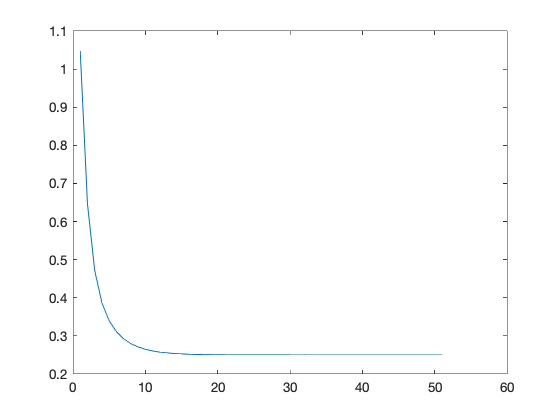

In [10]:
plot(1:length(history),history)

In [11]:
my_xor1 = @(x1, x2)(round(ws(1)*x1 + ws(2)*x2 + ws(3)));
for i=1:4
    fprintf("my_xor1(%d,%d)=%d\n", X(i,1),X(i,2), my_xor1(X(i,1),X(i,2)))
end

my_xor1(0,0)=0
my_xor1(0,1)=0
my_xor1(1,0)=0
my_xor1(1,1)=1



In [12]:
%%file accuracy.m
function a = accuracy(X,Y,f)
    correct = 0;
    for i=1:length(X)
        y = f(X(i,1),X(i,2));
        if y==Y(i)
            correct = correct +1;
        else
            fprintf("f(%d,%d)=%d, but should be %d\n", X(i,1),X(i,2), y, Y(i))
        end
    end
    a=correct/length(X);
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/accuracy.m'.


In [13]:
a=accuracy(X,Y,my_xor1)

f(0,1)=0, but should be 1
f(1,0)=0, but should be 1
f(1,1)=1, but should be 0

a =

    0.2500




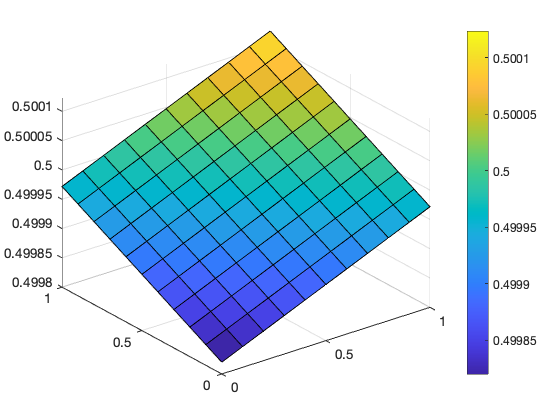

In [14]:
f = @(x1, x2)(ws(1)*x1 + ws(2)*x2+ws(3));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 

## Model 2: linear, one layer, sigmoid activation function 

The second model is still a (too) simple Neural Network model. As model $m_1$, it consists of one neuron connected to the input $x_1$ and $x_2$ but it uses a sigmoid activation function $s(x)=\frac{1}{1+e^{-x}}$. 
The cell body still implements $m_1(\mathbf w, b, x) = w_1x_1+w_2x_2+b$, the whole model $m_2$ implements:

$$m_2(\mathbf w, b, x)=\frac{1}{1+e^{-m_1(\mathbf w, b, x)}}$$

Note that we just plug in $m_1$ into $m_2$ and $m_2$ into the loss function $MSE$ to obtain the new composite model and loss functions.

In [15]:
s = @(x)(1.0 / (1.0 + exp(-x)))
m2 = @(ws,x)(s(m1(ws,x)))
mse2 = @(ws)(mse(ws,m2,X,Y))


s =

  function_handle with value:

    @(x)(1.0/(1.0+exp(-x)))


m2 =

  function_handle with value:

    @(ws,x)(s(m1(ws,x)))


mse2 =

  function_handle with value:

    @(ws)(mse(ws,m2,X,Y))




As we use the same initialization, we can assess $MSE$ for $m_2$ and this initial weights setting.

In [16]:
mse2(ws0)


ans =

    0.2939




For model $m_2$, the gradient of $MSE(\mathbf w,b)$ for any $\mathbf w, b$ is almost identical as before. We just plug in $m_2$ instead of $m_1$ and $m_2'$ instead of $m_1'$:

$$
\begin{aligned}
\nabla MSE(\vec w,b) &= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
\end{aligned}
$$

Let $s(x)=\frac{1}{1+e^{-x}}$. Then $\frac{\partial s(x)}{\partial x} = s(x)s(1-x)$, see the [details here](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e).

$$
\begin{aligned}
\frac{\partial m_2(\mathbf w,b,x_i)}{\partial \mathbf w, b} 
&=\frac{\partial s(m_1(\mathbf w,b,x_i))}{\partial \mathbf w, b} \\
&=s(m_1(\mathbf w,b,x_i))s(1-m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial \mathbf w, b} \\
\end{aligned}
$$

We can plug in the function $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as computed before.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

We have already defined the function $m_1$, the functions of the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp, and the sigmoid activation function $f$. The gradient calculation depends of these functions and the gradient descent method does not change either. We just need to pulg together the new neural network:

In [17]:
gradients2{1} = @(ws,x)(s(m1(ws,x))*s(1-m1(ws,x))*gradients1{1}(ws,x));
gradients2{2} = @(ws,x)(s(m1(ws,x))*s(1-m1(ws,x))*gradients1{2}(ws,x));
gradients2{3} = @(ws,x)(s(m1(ws,x))*s(1-m1(ws,x))*gradients1{3}(ws,x));

In [18]:
grad_loss = @(ws)(grad_mse(ws, m2, gradients2, X, Y));
K = 50;
learning_eps = 2;
[ws, history] = grad_desc_mse(K, ws0, learning_eps, mse2, grad_loss, false)


ws =

   -0.0001
    0.0204
   -0.0131


history =

  Columns 1 through 7

    0.2939    0.2800    0.2699    0.2634    0.2598    0.2579    0.2567

  Columns 8 through 14

    0.2558    0.2550    0.2543    0.2536    0.2531    0.2526    0.2522

  Columns 15 through 21

    0.2519    0.2516    0.2513    0.2511    0.2510    0.2508    0.2507

  Columns 22 through 28

    0.2506    0.2505    0.2504    0.2504    0.2503    0.2503    0.2502

  Columns 29 through 35

    0.2502    0.2502    0.2501    0.2501    0.2501    0.2501    0.2501

  Columns 36 through 42

    0.2501    0.2501    0.2500    0.2500    0.2500    0.2500    0.2500

  Columns 43 through 49

    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500    0.2500

  Columns 50 through 51

    0.2500    0.2500




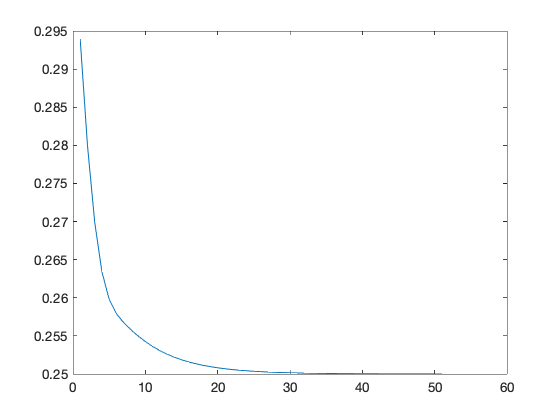

In [19]:
plot(1:length(history),history)

In [20]:
my_xor2 = @(x1, x2)(round(s(ws(1)*x1 + ws(2)*x2 + ws(3))));
for i=1:4
    fprintf("my_xor2(%d,%d)=%d\n", X(i,1),X(i,2), my_xor2(X(i,1),X(i,2)))
end
a=accuracy(X,Y,my_xor2)

my_xor2(0,0)=0
my_xor2(0,1)=1
my_xor2(1,0)=0
my_xor2(1,1)=1
f(1,0)=0, but should be 1
f(1,1)=1, but should be 0

a =

    0.5000




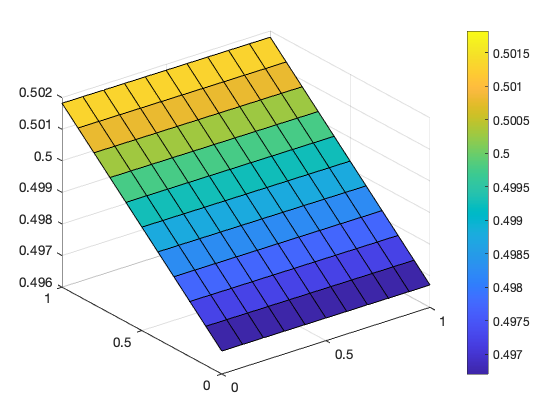

In [21]:
f = @(x1, x2)(s(ws(1)*x1 + ws(2)*x2 + ws(3)));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 

Not much changes as the co-domain of $m_1$ is just in the domain of the sigmoid activation function $s$ where it is almost linear.

## Model 3: one hidden layer with linear and one output layer with sigmoid activation

The third model adds a hidden layer of 32 neurons with linear activation function. Each of these neurons uses the three parameters $w_1, w_2, b$. As before, all parameters are captured in the parameter array `ws`. The parameters for each neuron are at different positions in this array. Let's define the model $m_3$ with hidden and output layers and the corresponding loss function $MSE$.

In [22]:
%%file hidden_layer.m
function y = hidden_layer(ws,x,n)
    y = zeros(n,1);
    for i=1:n
        i1 = (i-1)*3+1;
        i2 = (i-1)*3+2;
        i3 = (i-1)*3+3;
        y(i) = ws(i1)*x(1)+ws(i2)*x(2)+ws(i3);%as m1 before
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/hidden_layer.m'.


In [23]:
n=32;
%weights indices for the output layer n*3+1=97:n*3+n=128
%bias index for for the output layer n*3+n+1=129
mo = @(ws,x)(dot(hidden_layer(ws,x,n),ws(n*3+1:n*3+n))+ws(n*3+n+1));
m3 = @(ws,x)(s(mo(ws,x)));
mse3 = @(ws)(mse(ws,m3,X,Y));

We initialize the weight vector:

In [24]:
ws0 = zeros(n*3+n+1,1);%129
in = 2;
out = 1;
limit = sqrt(6 / (in + out));
for i=1:n
    i1 = (i-1)*3+1;
    i2 = (i-1)*3+2;
    i3 = (i-1)*3+3;
    ws0(i1) = rand*2*limit-limit;
    ws0(i2) = rand*2*limit-limit;
    ws0(i3) = 0;
end
in = n;
out = 1;
limit = sqrt(6 / (in + out));
for i=n*3+1:n*3+n
    ws0(i) = rand*2*limit-limit;
end
ws0


ws0 =

   -1.0550
    1.1692
         0
    0.3744
   -1.1383
         0
   -0.6265
    0.1326
         0
    1.2940
    1.3149
         0
   -0.9684
    1.3310
         0
    1.2931
   -0.0414
         0
    0.8493
   -1.0129
         0
   -0.2213
    1.1759
         0
    0.8265
    1.2996
         0
    0.4405
   -1.3132
         0
    0.9875
    1.2275
         0
    0.5055
    0.7290
         0
    0.6877
   -0.3048
         0
    0.4398
   -0.9300
         0
    0.5828
   -1.3242
         0
   -0.6310
   -1.2836
         0
   -1.1395
    0.9149
         0
    0.5511
   -0.5173
         0
    1.2734
   -1.3168
         0
   -0.1733
   -0.3350
         0
    0.7510
    0.8350
         0
   -0.8857
   -0.0290
         0
   -0.1539
    0.4138
         0
    0.5922
    0.7204
         0
   -0.6335
    0.5083
         0
    0.4387
   -0.9543
         0
   -1.0776
   -0.0046
         0
    1.3004
   -0.4515
         0
    0.2412
   -0.7812
         0
    0.7107
   -0.6927
         0
  

We are ready to compute the initial loss:

In [25]:
mse3(ws0)


ans =

    0.2553




Even for model the $m_3$ the gradient of $MSE({\mathbf{ws}}_o,{\mathbf{ws}}_h)$ for any weight ${\mathbf{ws}}_o,{\mathbf{ws}}_h$ of the output and hidden layers, resp., is almost identical as before. We just plug in $m_3$ instead of $m_2$ and $m_3'$ instead of $m_2'$:

$$
\begin{aligned}
\nabla MSE({\mathbf{ws}}_o,{\mathbf{ws}}_h) &= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h)\frac{\partial m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_o,{\mathbf{ws}}_h}\right ]^T \\
\frac{\partial m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} 
&=\frac{\partial s(m_o(\vec{\mathit{ws}}_o,\vec{\mathit{ws}}_h,x_i))}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} \\
&=s(m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i))s(1-m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i))\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} \\
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)}
&=\frac{\partial \sum_{k=1}^{n} (m_1({\mathbf{ws}}_{h,3(k-1)+1:2},{\mathbf{ws}}_{h,3(k-1)+3},x_i){\mathbf{ws}}_{o,k}) + {\mathbf{ws}}_{o,n+1}}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)}
\end{aligned}
$$

The term ${\mathbf{ws}}_{o,k}$  selects the $k$ weights of the output layer and the term ${\mathbf{ws}}_{o, k+1}$ selects the bias $b$ from the vector ${\mathbf{ws}_o}$. 
The term ${\mathbf{ws}}_{h,3(k-1)+1:2}$ selects the two weights $\mathbf w_{k,1}$ and $\mathbf w_{k,2}$ of the $k$-th neuron in the hidden layer, and the term ${\mathbf{ws}}_{h,3(k-1)+3}$ selects the $k$-th bias $\mathbf b_k$ from the vector ${\mathbf{ws}_h}$. 

The gradients wrt. the parameters of the hidden layer are

$$
\begin{aligned}
\frac{\partial m_o(\mathbf{ws}_o,\mathbf{ws}_h,x_i)}{\partial {\mathbf{ws}}_{h,3(k-1)+j}}
&=
\begin{cases}
  \frac{\partial m_1(\mathbf{w}_k,b_k,x_i)}{\partial \mathbf{w}_{k,j}}\mathbf{ws}_{o,k}, & \text{if}\ j=1,2 \\
  \frac{\partial m_1(\mathbf{w}_k,b_k,x_i)}{\partial b_k}\mathbf{ws}_{o,k}, & \text{if}\ j=3 
\end{cases}
\end{aligned}
$$

Since the cell function of the hidden layer is $m_1$, we can plug in the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as computed before.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

The gradients wrt. the weights and the bias, resp., of the output layer are

$$
\begin{aligned}
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_{o,k}}
&= m_1(\vec{w_k},b_k,x_i)\\
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_{o,n+1}}
&= 1
\end{aligned}
$$

In [26]:
%parameters (weights and bias) hidden layer
for k=1:n
    i1 = 3*(k-1)+1;
    i2 = 3*(k-1)+2;
    i3 = 3*(k-1)+3;
    gradients3{i1} = @(ws,x)(s(mo(ws,x))*s(1-mo(ws,x))*x(1)*ws(3*n+k)); %gradients1{1}=x(1)
    gradients3{i2} = @(ws,x)(s(mo(ws,x))*s(1-mo(ws,x))*x(2)*ws(3*n+k)); %gradients1{2}=x(2)
    gradients3{i3} = @(ws,x)(s(mo(ws,x))*s(1-mo(ws,x))*ws(3*n+k)); %gradients1{3}=1
    model1{k} = @(ws,x)(ws(i1)*x(1)+ws(i2)*x(2)+ws(i3));
end
%weights output layer
k=1;
for i=3*n+1:3*n+n
    gradients3{i} = @(ws,x)(s(mo(ws,x))*s(1-mo(ws,x))*model1{k}(ws,x)); 
    k=k+1;
end
%bias output layer
gradients3{3*n+n +1} = @(ws,x)(s(mo(ws,x))*s(1-mo(ws,x))); 

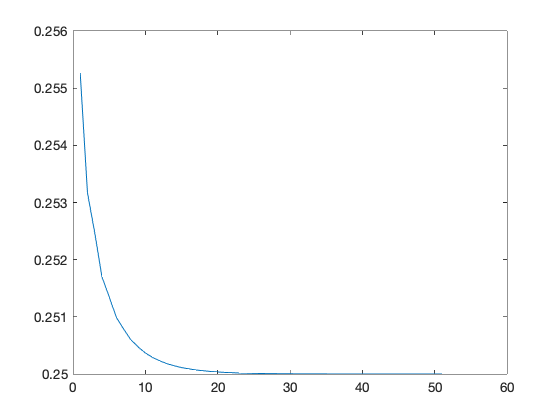

In [27]:
grad_loss = @(ws)(grad_mse(ws, m3, gradients3, X, Y));
K = 50;
learning_eps = 0.5;
[ws, history] = grad_desc_mse(K, ws0, learning_eps, mse3, grad_loss, false);
plot(1:length(history),history)

my_xor3(0,0)=1
my_xor3(0,1)=0
my_xor3(1,0)=0
my_xor3(1,1)=0
f(0,0)=1, but should be 0
f(0,1)=0, but should be 1
f(1,0)=0, but should be 1

a =

    0.2500




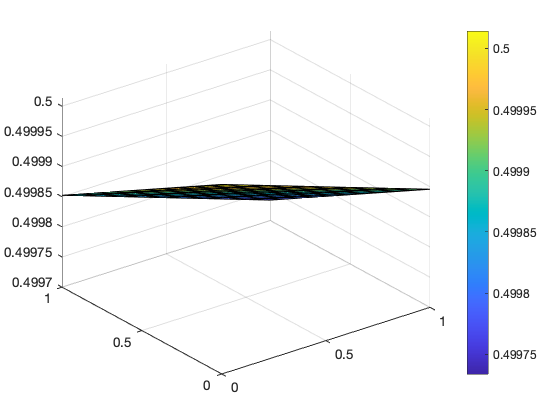

In [28]:
my_xor3 = @(x1, x2)(round(m3(ws,[x1,x2])));
for i=1:4
    fprintf("my_xor3(%d,%d)=%d\n", X(i,1),X(i,2), my_xor3(X(i,1),X(i,2)))
end
a=accuracy(X,Y,my_xor3)
f = @(x1, x2)(m3(ws,[x1,x2]));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 

## Model 4: one hidden layer with relu and one output layer with sigmoid activation 

The final model uses the Rectified Linear Unit (ReLU) activation function $r(x)=\max(0,x)$ in the hidden layer. Hence, the hidden layer neurons compute $\max(0, w_1x_1+w_2x_2+b)=\max(0,m_1(\vec w,b,x))$. We can easily change the hidden layer function accordingly.

In [29]:
hidden_layer_4 = @(ws,x,n)(max(0,hidden_layer(ws,x,n)));
mo4 = @(ws,x)(dot(hidden_layer_4(ws,x,n),ws(n*3+1:n*3+n))+ws(n*3+n+1));
m4 = @(ws,x)(s(mo4(ws,x)));
mse4 = @(ws)(mse(ws,m4,X,Y));

The network structure does not change, hence, the initialization remains the same as well. We can directly compute the initial loss:

In [30]:
mse4(ws0)


ans =

    0.2284




No surprise it is the same as for model $m_3$ as all weights and all input is positive.

As for the model $m_4$ itself, we need to subsitute $m_1(\mathbf w,b,x)$ with $r(\mathbf w,b,x)=\max(0,m_1(\mathbf w,b,x))$ and $m_1'(\mathbf w,b,x)$ with $r'(m_1(\mathbf w,b,x))m_1'(\mathbf w,b,x)$.

$$r'(z) = \begin{cases}
  0, & \text{if}\ z<0 \\
  1, & \text{if}\ z>0 
\end{cases}
$$

Note that $r'(z)$ is undefined in $z=0$, since its left and right derivative are not equal for $z=0$. In practice , we pick $r'(0)=0$ as Tensorflow does. Consequently: 

$$r'(m_1(\mathbf w,b,x))m_1'(\mathbf w,b,x) = \begin{cases}
  0, & \text{if}\ m_1(\mathbf w,b,x)\leq 0 \\
  m_1'(\mathbf w,b,x), & \text{if}\ m_1(\mathbf w,b,x)>0 
\end{cases}
$$


In [31]:
%%file ite.m
function res = ite(cond, tc, fc)
    if (cond)
        res = tc;
    else
        res = fc;
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/ite.m'.


In [32]:
%parameters (wights and bias) hidden layer
for k=1:n
    i1 = 3*(k-1)+1;
    i2 = 3*(k-1)+2;
    i3 = 3*(k-1)+3;
    model1{k} = @(ws,x)(max(0,ws(i1)*x(1)+ws(i2)*x(2)+ws(i3)));
    gradients4{i1} = @(ws,x)(s(mo4(ws,x))*s(1-mo4(ws,x))*ite(model1{k}(ws,x)<=0,0,x(1))*ws(3*n+k)); 
    gradients4{i2} = @(ws,x)(s(mo4(ws,x))*s(1-mo4(ws,x))*ite(model1{k}(ws,x)<=0,0,x(2))*ws(3*n+k)); 
    gradients4{i3} = @(ws,x)(s(mo4(ws,x))*s(1-mo4(ws,x))*ite(model1{k}(ws,x)<=0,0,1)*ws(3*n+k));
end
%weights output layer
k=1;
for i=3*n+1:3*n+n
    gradients4{i} = @(ws,x)(s(mo4(ws,x))*s(1-mo4(ws,x))*max(0,model1{k}(ws,x))); 
    k=k+1;
end
%bias output layer
gradients4{3*n+n +1} = @(ws,x)(s(mo4(ws,x))*s(1-mo4(ws,x))); 

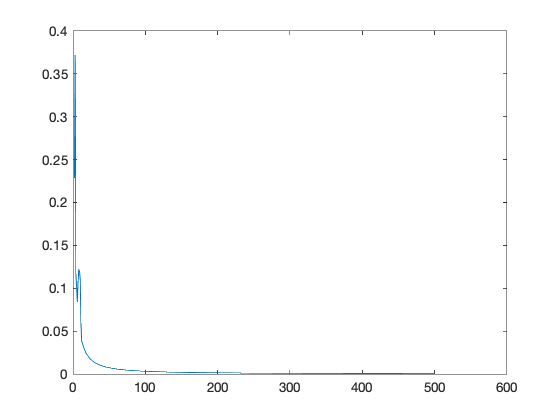

In [33]:
grad_loss = @(ws)(grad_mse(ws, m4, gradients4, X, Y));
K =500;
learning_eps = 1.5;
[ws, history] = grad_desc_mse(K, ws0, learning_eps, mse4, grad_loss, false);
plot(1:length(history),history)

my_xor4(0,0)=0
my_xor4(0,1)=1
my_xor4(1,0)=1
my_xor4(1,1)=0

a =

     1




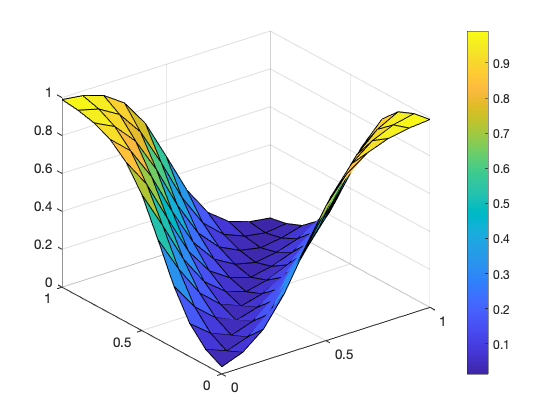

In [34]:
my_xor4 = @(x1, x2)(round(m4(ws,[x1,x2])));
for i=1:4
    fprintf("my_xor4(%d,%d)=%d\n", X(i,1),X(i,2), my_xor4(X(i,1),X(i,2)))
end
a=accuracy(X,Y,my_xor4)
f = @(x1, x2)(m4(ws,[x1,x2]));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 

## Comparison with Model 4 learned with Tensorflow

Weights of the hidden layer (manually copied):

In [35]:
w11 = reshape([ 0.41652033,  0.7749157 ,  0.83778775,  0.64122725,  0.3972386 ,
         -0.13516521, -0.60432655, -0.20290181, -0.7232665 , -0.35317   ,
         -0.8889785 , -0.2863993 ,  0.54030126,  0.37175888, -0.82367843,
         -0.33497408, -0.8567182 ,  0.5161414 , -0.25462216,  0.59564906,
          0.80922335,  0.00252599,  0.3720131 , -0.1701207 ,  0.34805146,
         -0.38333094, -0.17244412,  0.7132528 , -0.14648864, -0.17876345].', 1,[]).';
w11 = [w11; [-0.6636416 ; -0.39717668]];
w12 = reshape([0.41662493, -0.7749062 , -0.8376726 , -0.64101034,  0.40976927,
         -0.09223783,  0.60428804, -0.09886253,  0.7417394 , -0.08979583,
          1.1194593 ,  0.13293397,  0.5400226 ,  0.37171456,  0.8246372 ,
         -0.43565178,  0.85677105,  0.51622313, -0.41895077, -0.5953253 ,
         -0.8091849 , -0.3766787 ,  0.28819063, -0.38122708,  0.34833792,
          0.15245543, -0.25060123, -0.7132655 , -0.30406952, -0.3443008].', 1,[]).';
w12 = [w12; [0.66343206; -0.03848529]];
b1 = reshape([-4.16518986e-01, -4.11640503e-05, -1.45169579e-05, -3.96516771e-06,
        -1.09622735e-04,  0.00000000e+00,  2.90098578e-05,  0.00000000e+00,
        -1.63983065e-03,  0.00000000e+00, -6.36966957e-04, -1.47912502e-01,
        -5.39916575e-01, -3.71752203e-01, -5.50682598e-04,  1.15736163e+00,
        -6.27825721e-05, -5.16140461e-01,  0.00000000e+00, -1.62737619e-04,
        -8.02413124e-05, -2.25486048e-02,  1.79730232e-05,  0.00000000e+00,
        -3.48306417e-01, -1.66664287e-01,  0.00000000e+00, -3.03934885e-05,
         0.00000000e+00,  0.00000000e+00,  6.44910688e-05,  0.00000000e+00].', 1,[]).';
ws1=[w11,w12,b1];
ws1=reshape(ws1.',1,[]).';

Weights of the output layer manually copied:

In [36]:
ws2 = [-0.8178053 ,
1.0259871 ,
0.7672013 ,
0.9983522 ,
0.3300904 ,
0.1318875 ,
0.9221373 ,
0.20387506,
1.0057546 ,
0.2067241 ,
0.7479725 ,
-0.25578788,
-0.83140665,
-0.952559  ,
0.946334  ,
-1.0112743 ,
0.5946371 ,
-1.0230583 ,
-0.04098088,
0.9588608 ,
0.7448052 ,
-0.10435582,
0.25728533,
0.30141222,
-0.8235109 ,
-0.21171094,
-0.28320622,
1.0405817 ,
0.40911728,
0.37331975,
0.87603277,
0.19098908,
-0.8885394];
ws = [ws1;ws2];

Replace the learned weights of model $m_4$ with the copied weights and assess the function:

my_xor5(0,0)=0
my_xor5(0,1)=1
my_xor5(1,0)=1
my_xor5(1,1)=0

a =

     1




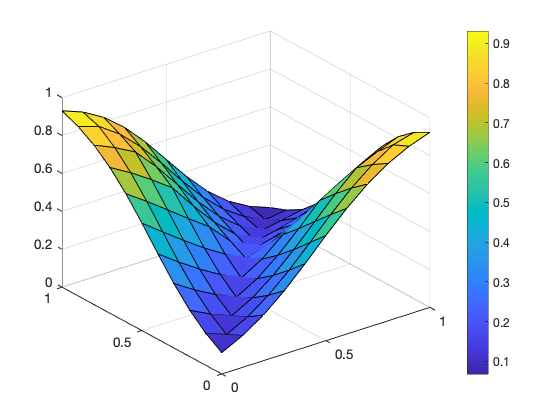

In [37]:
my_xor5 = @(x1, x2)(round(m4(ws,[x1,x2])));
for i=1:4
    fprintf("my_xor5(%d,%d)=%d\n", X(i,1),X(i,2), my_xor5(X(i,1),X(i,2)))
end
a=accuracy(X,Y,my_xor5)
f = @(x1, x2)(m4(ws,[x1,x2]));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 